In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '21eff628-b5ee-4f25-87e6-c89e3734b397',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-10-24T16:22:55.992Z', 'error_code': 0, 'error_message': None, 'elapsed': 9, 'credit_count': 1, 'notice': None, 'total_count': 9863}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11788, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
            

In [3]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11788,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.977236e+07,1.977236e+07,False,NaN,1,NaN,NaN,None,2024-10-24T16:20:00.000Z,67358.260701,3.337346e+10,20.0205,-0.657069,2.091022,0.032433,6.482068,4.950707,-0.348164,1.331832e+12,57.6683,1.414523e+12,None,2024-10-24T16:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-24 17:22:55.458257
1,1027,Ethereum,ETH,ethereum,9445,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203958e+08,1.203958e+08,True,NaN,2,NaN,NaN,None,2024-10-24T16:20:00.000Z,2508.856341,1.864276e+10,30.6760,-0.777175,-0.899863,-4.212997,-4.137999,-9.334747,-22.975816,3.020558e+11,13.0790,3.020558e+11,None,2024-10-24T16:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-24 17:22:55.458257
2,825,Tether USDt,USDT,tether,101458,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.202217e+11,1.213379e+11,True,NaN,3,NaN,NaN,None,2024-10-24T16:20:00.000Z,0.999160,6.284400e+10,20.1032,0.014885,0.018829,-0.056420,-0.120465,-0.136633,-0.106747,1.201207e+11,5.2012,1.212360e+11,None,2024-10-24T16:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-24 17:22:55.458257
3,1839,BNB,BNB,bnb,2271,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459313e+08,1.459313e+08,False,NaN,4,NaN,NaN,None,2024-10-24T16:20:00.000Z,590.646487,1.657164e+09,0.4858,-0.183629,2.248567,-0.284800,-2.540240,2.638161,2.121835,8.619379e+10,3.7322,8.619379e+10,None,2024-10-24T16:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-24 17:22:55.458257
4,5426,Solana,SOL,solana,770,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.700992e+08,5.871179e+08,True,NaN,5,NaN,NaN,None,2024-10-24T16:20:00.000Z,175.070440,4.332678e+09,52.5042,-0.757927,4.847376,15.442993,20.249903,9.419672,-3.271584,8.230048e+10,3.5636,1.027870e+11,None,2024-10-24T16:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-24 17:22:55.458257
5,3408,USDC,USDC,usd-coin,22639,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.436653e+10,3.436653e+10,False,NaN,6,NaN,NaN,None,2024-10-24T16:20:00.000Z,0.999897,7.388065e+09,25.1386,0.008595,0.011405,-0.000924,0.012554,-0.016408,-0.041700,3.436297e+10,1.4879,3.436297e+10,None,2024-10-24T16:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-24 17:22:55.458257
6,52,XRP,XRP,xrp,1411,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.670644e+10,9.998712e+10,False,NaN,7,NaN,NaN,None,2024-10-24T16:20:00.000Z,0.528191,1.057716e+09,20.8714,-0.334747,1.047820,-4.348169,-9.428479,-12.432257,-10.748666,2.995184e+10,1.3263,5.281911e+10,None,2024-10-24T16:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-24 17:22:55.458257
7,74,Dogecoin,DOGE,dogecoin,1088,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.465021e+11,1.465021e+11,True,NaN,8,NaN,NaN,None,2024-10-24T16:19:00.000Z,0.139971,1.482401e+09,12.4315,-1.218952,2.244206,14.678206,30.321022,26.707268,7.445656,2.050611e+10,0.9081,2.050611e+10,None,2024-10-24T16:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-24 17:22:55.458257
8,1958,TRON,TRX,tron,1058,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.649567e+10,8.649

In [4]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '21eff628-b5ee-4f25-87e6-c89e3734b397',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

        
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    if not os.path.isfile(r'C:\Users\bisho\Documents\python tutorials\API.csv'):
        df.to_csv(r'C:\Users\bisho\Documents\python tutorials\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\bisho\Documents\python tutorials\API.csv', mode = 'a', header = False)

In [5]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2024-10-24T16:22:58.780Z', 'error_code': 0, 'error_message': None, 'elapsed': 15, 'credit_count': 1, 'notice': None, 'total_count': 9863}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11788, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

df72 = pd.read_csv(r'C:\Users\bisho\Documents\python tutorials\API.csv')

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' )

In [ ]:
df2 = pd.json_normalize(data['data'])
df2['timestamp'] = pd.to_datetime('now')
df_append = pd.DataFrame(df2)
df = pd.concat(df,df_append)

In [ ]:
df

In [9]:
df72 = pd.read_csv(r'C:\Users\bisho\Documents\python tutorials\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11776,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.976847e+07,1.976847e+07,False,NaN,1,NaN,NaN,NaN,2024-10-16T16:40:00.000Z,67623.401553,4.447163e+10,-1.9850,-0.337101,0.943417,9.383114,16.980997,13.506039,6.001315,1.336811e+12,57.7842,1.420091e+12,NaN,2024-10-16T16:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-16 17:41:38.835383
1,1,1027,Ethereum,ETH,ethereum,9423,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.203862e+08,1.203862e+08,True,NaN,2,NaN,NaN,NaN,2024-10-16T16:40:00.000Z,2605.172141,1.902686e+10,-10.0212,-0.278780,-0.151405,6.953591,13.718553,-0.351660,-23.615523,3.136268e+11,13.5566,3.136268e+11,NaN,2024-10-16T16:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-16 17:41:38.835383
2,2,825,Tether USDt,USDT,tether,100423,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.199722e+11,1.213629e+11,True,NaN,3,NaN,NaN,NaN,2024-10-16T16:40:00.000Z,0.999797,7.132612e+10,-10.9034,-0.015060,0.015971,0.060511,-0.009787,-0.039223,-0.003830,1.199478e+11,5.1868,1.213383e+11,NaN,2024-10-16T16:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-16 17:41:38.835383
3,3,1839,BNB,BNB,bnb,2259,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459317e+08,1.459317e+08,False,NaN,4,NaN,NaN,NaN,2024-10-16T16:40:00.000Z,593.079967,1.883583e+09,-5.8294,-0.542988,-0.127422,2.491767,10.996098,10.676411,4.284988,8.654920e+10,3.7411,8.654920e+10,NaN,2024-10-16T16:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-16 17:41:38.835383
4,4,5426,Solana,SOL,solana,767,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.698600e+08,5.867199e+08,True,NaN,5,NaN,NaN,NaN,2024-10-16T16:40:00.000Z,154.542860,2.670693e+09,-16.6822,-0.632084,-0.605776,9.582471,17.953364,9.620513,-1.726109,7.261350e+10,3.1400,9.067337e+10,NaN,2024-10-16T16:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-16 17:41:38.835383
5,5,3408,USDC,USDC,usd-coin,22491,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.476853e+10,3.476853e+10,False,NaN,6,NaN,NaN,NaN,2024-10-16T16:40:00.000Z,0.999912,7.397213e+09,-8.1824,-0.012541,0.004551,-0.005162,0.001150,-0.002804,-0.007320,3.476546e+10,1.5028,3.476546e+10,NaN,2024-10-16T16:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-16 17:41:38.835383
6,6,52,XRP,XRP,xrp,1404,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.664506e+10,9.998714e+10,False,NaN,7,NaN,NaN,NaN,2024-10-16T16:40:00.000Z,0.547682,1.073570e+09,-16.5378,-0.203589,0.545220,2.952873,-4.439890,-3.664188,-4.122633,3.102345e+10,1.3415,5.476816e+10,NaN,2024-10-16T16:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-16 17:41:38.835383
7,7,74,Dogecoin,DOGE,dogecoin,1080,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.463926e+11,1.463926e+11,True,NaN,8,NaN,NaN,NaN,2024-10-16T16:40:00.000Z,0.125442,2.155702e+09,71.7794,-0.593675,9.306531,14.138811,26.187649,21.659946,5.349289,1.836374e+10,0.7941,1.836374e+10,NaN,2024-10-16T16:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-16 17:41:38.835383
8,8,1958,TRON,TRX,tron,1050,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,8

In [11]:
df3 = df72.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d', 'quote.USD.percent_change_30d','quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.112286,-0.149275,0.238096,6.801027,5.639330,3.588887
Ethereum,-0.016392,-1.418903,-0.740810,-0.696512,-5.708169,-19.760906
Tether USDt,0.008293,-0.001757,-0.035500,-0.062378,-0.106426,-0.048467
BNB,0.060247,-0.759943,-0.910450,-0.065623,2.069310,3.872858
Solana,0.630780,1.506313,9.548280,17.128521,8.086945,-0.854333
USDC,0.006002,0.003006,-0.001735,-0.010788,-0.006136,-0.011144
XRP,0.135916,-0.380656,-2.799002,-9.224945,-13.485830,-11.245502
Dogecoin,0.817946,1.634162,12.596935,30.217195,25.347000,11.133048
TRON,0.158359,0.656839,0.387067,5.525633,2.452720,18.572578


In [13]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.112286,-0.149275,0.238096,6.801027,5.639330,3.588887
Ethereum,-0.016392,-1.418903,-0.740810,-0.696512,-5.708169,-19.760906
Tether USDt,0.008293,-0.001757,-0.035500,-0.062378,-0.106426,-0.048467
BNB,0.060247,-0.759943,-0.910450,-0.065623,2.069310,3.872858
Solana,0.630780,1.506313,9.548280,17.128521,8.086945,-0.854333
USDC,0.006002,0.003006,-0.001735,-0.010788,-0.006136,-0.011144
XRP,0.135916,-0.380656,-2.799002,-9.224945,-13.485830,-11.245502
Dogecoin,0.817946,1.634162,12.596935,30.217195,25.347000,11.133048
TRON,0.158359,0.656839,0.387067,5.525633,2.452720,18.572578


In [15]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.112286
              quote.USD.percent_change_24h    -0.149275
              quote.USD.percent_change_7d      0.238096
              quote.USD.percent_change_30d     6.801027
              quote.USD.percent_change_60d     5.639330
              quote.USD.percent_change_90d     3.588887
Ethereum      quote.USD.percent_change_1h     -0.016392
              quote.USD.percent_change_24h    -1.418903
              quote.USD.percent_change_7d     -0.740810
              quote.USD.percent_change_30d    -0.696512
              quote.USD.percent_change_60d    -5.708169
              quote.USD.percent_change_90d   -19.760906
Tether USDt   quote.USD.percent_change_1h      0.008293
              quote.USD.percent_change_24h    -0.001757
              quote.USD.percent_change_7d     -0.035500
              quote.USD.percent_change_30d    -0.062378
              quote.USD.percent_change_60d    -0.106426
     

In [17]:
type(df4)

pandas.core.series.Series

In [19]:
df5 = df4.to_frame(name ='values')
df5

values
name                                                
Bitcoin      quote.USD.percent_change_1h    0.112286
             quote.USD.percent_change_24h  -0.149275
             quote.USD.percent_change_7d    0.238096
             quote.USD.percent_change_30d   6.801027
             quote.USD.percent_change_60d   5.639330
             quote.USD.percent_change_90d   3.588887
Ethereum     quote.USD.percent_change_1h   -0.016392
             quote.USD.percent_change_24h  -1.418903
             quote.USD.percent_change_7d   -0.740810
             quote.USD.percent_change_30d  -0.696512
             quote.USD.percent_change_60d  -5.708169
             quote.USD.percent_change_90d -19.760906
Tether USDt  quote.USD.percent_change_1h    0.008293
             quote.USD.percent_change_24h  -0.001757
             quote.USD.percent_change_7d   -0.035500
             quote.USD.percent_change_30d  -0.062378
             quote.USD.percent_change_60d  -0.106426
             quote.USD.percent_change_90d  -0.048467
BNB          quote.USD.percent_change_1h    0.060247
             quote.USD.percent_change_24h  -0.759943
             quote.USD.percent_change_7d   -0.910450
             quote.USD.percent_change_30d  -0.065623
             quote.USD.percent_change_60d   2.069310
             quote.USD.percent_change_90d   3.872858
Solana       quote.USD.percent_change_1h    0.630780
             quote.USD.percent_change_24h   1.506313
             quote.USD.percent_change_7d    9.548280
             quote.USD.percent_change_30d  17.128521
             quote.USD.percent_change_60d   8.086945
             quote.USD.percent_change_90d  -0.854333
USDC         quote.USD.percent_change_1h    0.006002
             quote.USD.percent_change_24h   0.003006
             quote.USD.percent_change_7d   -0.001735
             quote.USD.percent_change_30d  -0.010788
             quote.USD.percent_change_60d  -0.006136
             quote.USD.percent_change_90d  -0.011144
XRP          quote.USD.percent_change_1h    0.135916
             quote.USD.percent_change_24h  -0.380656
             quote.USD.percent_change_7d   -2.799002
             quote.USD.percent_change_30d  -9.224945
             quote.USD.percent_change_60d -13.485830
             quote.USD.percent_change_90d -11.245502
Dogecoin     quote.USD.percent_change_1h    0.817946
             quote.USD.percent_change_24h   1.634162
             quote.USD.percent_change_7d   12.596935
             quote.USD.percent_change_30d  30.217195
             quote.USD.percent_change_60d  25.347000
             quote.USD.percent_change_90d  11.133048
TRON         quote.USD.percent_change_1h    0.158359
             quote.USD.percent_change_24h   0.656839
             quote.USD.percent_change_7d    0.387067
             quote.USD.percent_change_30d   5.525633
             quote.USD.percent_change_60d   2.452720
             quote.USD.percent_change_90d  18.572578
Toncoin      quote.USD.percent_change_1h    0.007482
             quote.USD.percent_change_24h  -0.930369
             quote.USD.percent_change_7d   -1.637458
             quote.USD.percent_change_30d  -8.086056
             quote.USD.percent_change_60d -21.318997
             quote.USD.percent_change_90d -22.497814
Cardano      quote.USD.percent_change_1h    0.129451
             quote.USD.percent_change_24h  -1.405274
             quote.USD.percent_change_7d   -0.258833
             quote.USD.percent_change_30d  -0.657243
             quote.USD.percent_change_60d  -8.189079
             quote.USD.percent_change_90d -11.848557
Avalanche    quote.USD.percent_change_1h    0.219636
             quote.USD.percent_change_24h  -2.519351
             quote.USD.percent_change_7d   -2.787751
             quote.USD.percent_change_30d  -0.013692
             quote.USD.percent_change_60d   3.275918
             quote.USD.percent_change_90d  -1.609703
Shiba Inu    quote.USD.percent_change_1h    0.319284
             quote.USD.percent_change_24h  -1.010564
             quote

In [21]:
type(df5)

pandas.core.frame.DataFrame

In [23]:
df5.count()

values    90
dtype: int64

In [25]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.112286
1,Bitcoin,quote.USD.percent_change_24h,-0.149275
2,Bitcoin,quote.USD.percent_change_7d,0.238096
3,Bitcoin,quote.USD.percent_change_30d,6.801027
4,Bitcoin,quote.USD.percent_change_60d,5.639330
5,Bitcoin,quote.USD.percent_change_90d,3.588887
6,Ethereum,quote.USD.percent_change_1h,-0.016392
7,Ethereum,quote.USD.percent_change_24h,-1.418903
8,Ethereum,quote.USD.percent_change_7d,-0.740810
9,Ethereum,quote.USD.percent_change_30d,-0.696512


In [27]:
df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.112286
1,Bitcoin,quote.USD.percent_change_24h,-0.149275
2,Bitcoin,quote.USD.percent_change_7d,0.238096
3,Bitcoin,quote.USD.percent_change_30d,6.801027
4,Bitcoin,quote.USD.percent_change_60d,5.639330
5,Bitcoin,quote.USD.percent_change_90d,3.588887
6,Ethereum,quote.USD.percent_change_1h,-0.016392
7,Ethereum,quote.USD.percent_change_24h,-1.418903
8,Ethereum,quote.USD.percent_change_7d,-0.740810
9,Ethereum,quote.USD.percent_change_30d,-0.696512


In [45]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.112286
1,Bitcoin,24h,-0.149275
2,Bitcoin,7d,0.238096
3,Bitcoin,30d,6.801027
4,Bitcoin,60d,5.639330
5,Bitcoin,90d,3.588887
6,Ethereum,1h,-0.016392
7,Ethereum,24h,-1.418903
8,Ethereum,7d,-0.740810
9,Ethereum,30d,-0.696512


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

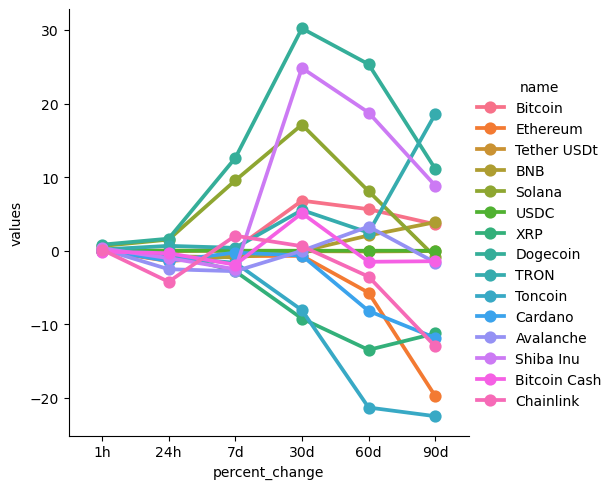

In [47]:
sns.catplot(x = 'percent_change', y = 'values', hue ='name', data= df7, kind = 'point')

In [57]:
df10=df72[['name', 'quote.USD.price','timestamp']]
df10 = df10.query("name=='Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,67623.401553,2024-10-16 17:41:38.835383
15,Bitcoin,67623.401553,2024-10-16 17:42:39.862739
30,Bitcoin,67581.491286,2024-10-16 17:43:40.850911
45,Bitcoin,67605.692748,2024-10-16 17:44:41.561135
60,Bitcoin,67565.421571,2024-10-16 17:45:42.378857
75,Bitcoin,67565.421571,2024-10-16 17:46:43.351748
90,Bitcoin,67565.086241,2024-10-16 17:47:44.097136
105,Bitcoin,67234.038205,2024-10-21 15:39:20.370122
120,Bitcoin,67234.038205,2024-10-21 15:40:21.652527
135,Bitcoin,67229.030462,2024-10-21 15:41:22.991928


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

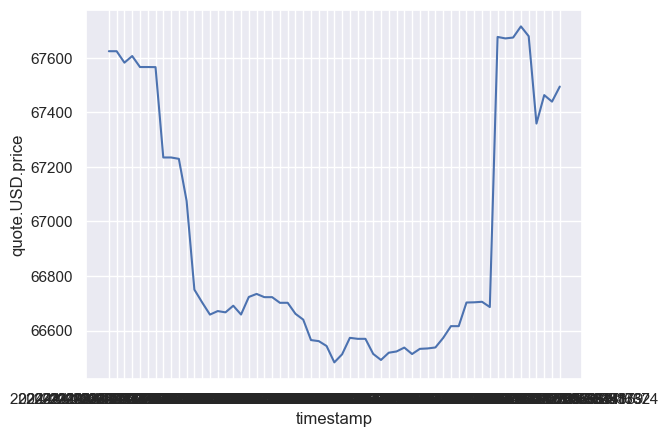

In [61]:
sns.set_theme(style = 'darkgrid')
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df10)